In [0]:
import keras
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten # wx+b dense, fully-connected, linear layer

### 1. Representing data in a correct shape.

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train[0].max()

255

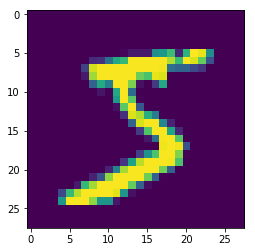

In [26]:
plt.figure()
plt.imshow(x_train[0])

In [27]:
y_train[0]

5

In [0]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)

In [29]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_dev = x_train[50000:]
y_dev = y_train_one_hot[50000:]

In [0]:
x_train = x_train[:50000]
y_train = y_train_one_hot[:50000]

In [34]:
x_train.shape, y_train.shape, x_dev.shape, y_dev.shape

((50000, 28, 28), (50000, 10), (10000, 28, 28), (10000, 10))

In [35]:
x_train[0].dtype

dtype('uint8')

In [0]:
x_train = x_train.astype('float32') /255
x_dev = x_dev.astype('float32') /255
x_test = x_test.astype('float32') /255

### 2. Choose the family of functions

In [0]:
model = Sequential() #for adding layers
model.add(Flatten()) #for giving the correct shape
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation="softmax"))

### 3. Select a strategy for finding the best function f from the chosen family

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"]
             )

In [49]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
         validation_data=[x_dev, y_dev]) #verbose = show the output or not

# see the accuracy on the val set to see if there is overfitting

W0706 06:29:09.411282 140622376527744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0706 06:29:09.467055 140622376527744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.2799 - acc: 0.6899 - val_loss: 0.7106 - val_acc: 0.8567
Epoch 2/10
50000/50000 [==============================] - 2s 37us/step - loss: 0.6181 - acc: 0.8544 - val_loss: 0.4844 - val_acc: 0.8830
Epoch 3/10
50000/50000 [==============================] - 2s 35us/step - loss: 0.4843 - acc: 0.8758 - val_loss: 0.4091 - val_acc: 0.8953
Epoch 4/10
50000/50000 [==============================] - 2s 36us/step - loss: 0.4272 - acc: 0.8863 - val_loss: 0.3712 - val_acc: 0.9017
Epoch 5/10
50000/50000 [==============================] - 2s 36us/step - loss: 0.3940 - acc: 0.8922 - val_loss: 0.3471 - val_acc: 0.9055
Epoch 6/10
50000/50000 [==============================] - 2s 35us/step - loss: 0.3713 - acc: 0.8974 - val_loss: 0.3305 - val_acc: 0.9104
Epoch 7/10
50000/50000 [==============================] - 2s 37us/step - loss: 0.3544 - acc: 0.9010 - val_loss: 0.3180 - val_acc

In [50]:
model.summary()
# first layer - 28*28=784 vector 
# w(784*100)+100b=78500

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [52]:
score = model.evaluate(x_test, keras.utils.to_categorical(y_test, 10))

10000/10000 [==============================] - 0s 27us/step


In [55]:
print(score)

[0.3001124509632587, 0.9158]
